In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle  # to save and the final model
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [31]:
data=pd.read_csv('titanic_train.csv')
data.head( )



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
data.shape


(891, 12)

In [33]:
data.describe( )

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
data.info( )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
data.isna().sum()       

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
data['Age']= data['Age'].fillna(data['Age'].mean( ))

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
data.isna().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
data['Cabin']= data['Cabin'].fillna(data['Cabin'].mode( )[0])

In [40]:
data.isna().sum()  

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [41]:
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode( )[0])

In [42]:
data.isna().sum()  

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
lab_enc=LabelEncoder( )

In [45]:
data2=lab_enc.fit_transform(data['Name'])

data['Name']=data2

In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,190,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,353,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,272,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,15,male,35.0,0,0,373450,8.0500,B96 B98,S


In [47]:
data3=lab_enc.fit_transform(data['Sex'])
data['Sex']=data3

data4=lab_enc.fit_transform(data['Ticket'])
data['Ticket']=data4

data5=lab_enc.fit_transform(data['Embarked'])
data['Embarked']=data5

data6=lab_enc.fit_transform(data['Cabin'])
data['Cabin']=data6

In [48]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,47,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,47,2
5,6,0,3,554,1,29.699118,0,0,275,8.4583,47,1
6,7,0,1,515,1,54.000000,0,0,85,51.8625,129,2
7,8,0,3,624,1,2.000000,3,1,395,21.0750,47,2
8,9,1,3,412,0,27.000000,0,2,344,11.1333,47,2
9,10,1,2,576,0,14.000000,1,0,132,30.0708,47,0


ValueError: num must be 1 <= num <= 9, not 10

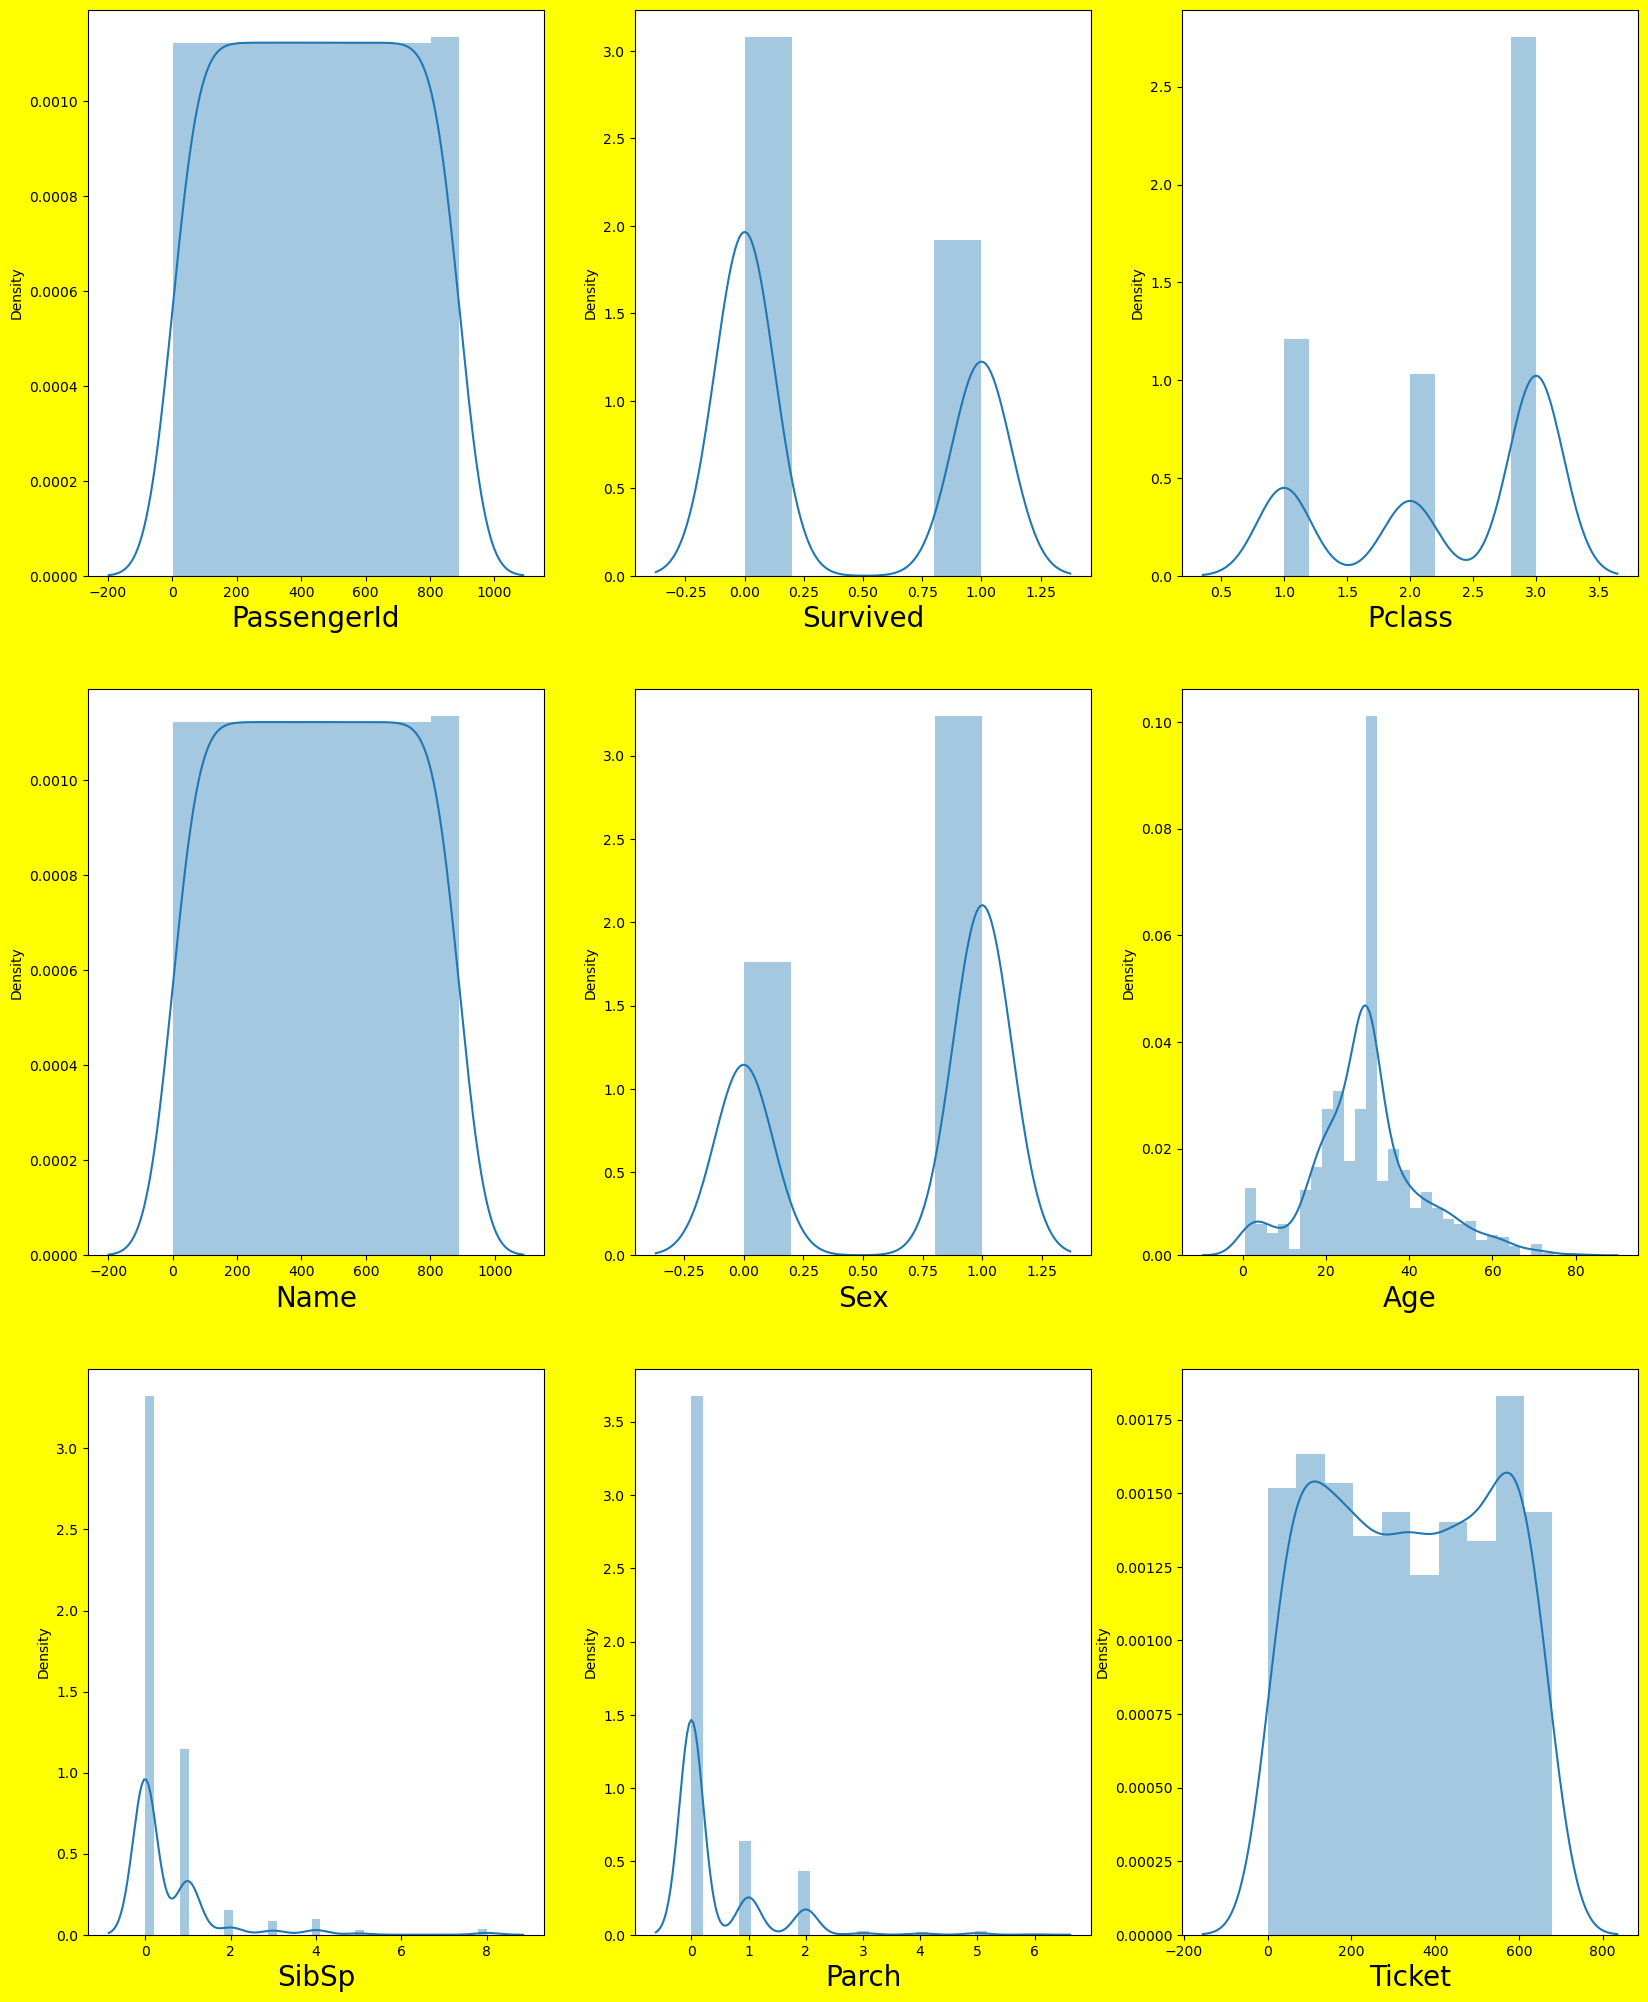

In [49]:
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber=1
for column in data:
      if plotnumber<=12:
            ax=plt.subplot(3,3,plotnumber)
            sns.distplot(data[column])
            plt.xlabel(column, fontsize=20)
            plotnumber+=1
plt.tight_layout( )


In [54]:
Y=data['Survived']
X=data.drop(columns= ['Survived'])

In [55]:
scaler=StandardScaler( )
X_scaled=scaler.fit_transform(X)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled, Y, test_size=0.25, random_state=348)

In [57]:
log_reg=LogisticRegression( )
log_reg.fit(x_train,y_train)



LogisticRegression()

In [58]:
y_pred=log_reg.predict(x_test)

In [59]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)